# Customer Churn Rate Prediction

Customer churn rate prediction is a common project in the field of customer analytics and customer relationship management. It involves developing a machine learning model to predict which customers are likely to churn or discontinue their relationship with a business or service provider. The goal is to proactively identify customers at risk of churning and take appropriate actions to retain them.

# Importing Libraries

These are just a few examples of popular Python libraries. You can import any other library using the same import statement followed by the library name or alias:

NumPy: for numerical operations and array manipulation

Pandas: for data manipulation and analysis

Matplotlib: for creating visualizations

Scikit-learn: for machine learning algorithms.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Importing Dataset

In [2]:
dataframe = pd.read_csv('Churn_Modelling.csv')

# Exploratory Data Analysis

Exploratory Data Analysis (EDA) is a process in data analysis where the primary objective is to gain insights and understanding of a dataset. It involves examining and summarizing the main characteristics of the data using various statistical and visualization techniques. The key steps in EDA typically include data cleaning, data transformation, and data visualization.

In [4]:
dataframe.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
dataframe.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
dataframe.select_dtypes(include = 'object').head()

,Surname,Geography,Gender
0,Hargrave,France,Female
1,Hill,Spain,Female
2,Onio,France,Female
3,Boni,France,Female
4,Mitchell,Spain,Female


In [8]:
dataframe.select_dtypes(include = ['float64', 'int64']).head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,0


In [9]:
dataframe.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# Statical Info

Statistical information refers to numerical data or metrics that describe various aspects of a dataset or population. These statistics provide quantitative measures of central tendency, dispersion, relationships, and other properties of the data

In [10]:
dataframe.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Correlation Matrix

A correlation matrix is a table that shows the pairwise correlations between variables in a dataset. Each cell in the table represents the correlation between two variables, and the strength and direction of the correlation is indicated by the color and magnitude of the cell.

Correlation matrices are commonly used in data analysis to identify relationships between variables and to help understand the structure of the data. The values in the correlation matrix range from -1 to 1, with -1 indicating a perfect negative correlation, 1 indicating a perfect positive correlation, and 0 indicating no correlation.

In [11]:
corr_matrix = dataframe.corr()

In [12]:
corr_matrix

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


<AxesSubplot:>

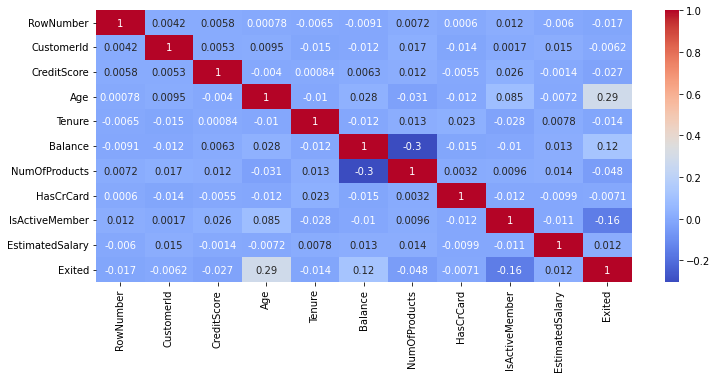

In [13]:
plt.figure(figsize = (12, 5))
sns.heatmap(
    corr_matrix, 
    annot = True,
    cmap = 'coolwarm'
)

In [14]:
dataframe.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [15]:
dataframe.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [16]:
dataframe.select_dtypes(include = 'object').columns

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [17]:
dataframe = dataframe.drop(['Surname', 'Geography', 'Gender'], axis = 1)

In [18]:
dataframe.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,0


In [19]:
dataframe = pd.get_dummies(data = dataframe, drop_first = True)

In [20]:
dataframe.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,0


In [21]:
x = dataframe.drop('Exited', axis = 1)
y = dataframe['Exited']

# Splitting Dataset

Dataset splitting is an important step in machine learning and data analysis. It involves dividing a dataset into two or more subsets to train and evaluate a model effectively. The most common type of dataset splitting is into training and testing subsets.

Train-Test Split: This is the most basic type of split, where the dataset is divided into a training set and a testing set. The training set is used to train the machine learning model, while the testing set is used to evaluate its performance. The split is typically done using a fixed ratio, such as 80% for training and 20% for testing.

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train, x_test, y_train, y_test = train_test_split(
    x, 
    y, 
    test_size = 0.2, 
    random_state = 42
)

In [24]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((8000, 10), (2000, 10), (8000,), (2000,))

# Scaling

Scaling is a preprocessing step in machine learning that involves transforming the features or variables of your dataset to a consistent scale. It is important because many machine learning algorithms are sensitive to the scale of the input features. Scaling helps ensure that all features have a similar range and distribution, which can improve the performance and convergence of the model.

StandardScaler is a popular scaling technique used in machine learning to standardize features by removing the mean and scaling to unit variance. It is available in the scikit-learn library, which provides a wide range of machine learning tools and preprocessing functions.

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()

In [27]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [28]:
x_train

array([[ 1.4692775 , -1.24645641,  0.35649971, ...,  0.64920267,
         0.97481699,  1.36766974],
       [-1.19499359,  1.05381124, -0.20389777, ...,  0.64920267,
         0.97481699,  1.6612541 ],
       [-1.15724427,  0.3664786 , -0.96147213, ...,  0.64920267,
        -1.02583358, -0.25280688],
       ...,
       [ 0.13108128, -1.6259648 ,  0.86500853, ..., -1.54035103,
        -1.02583358, -0.1427649 ],
       [-1.43776677,  1.62852321,  0.15932282, ...,  0.64920267,
        -1.02583358, -0.05082558],
       [ 0.78217054,  0.21718071,  0.47065475, ...,  0.64920267,
         0.97481699, -0.81456811]])

In [29]:
x_test

array([[ 0.42961263, -0.04416715, -0.57749609, ..., -1.54035103,
        -1.02583358, -1.01960511],
       [-0.11342351,  0.64443214, -0.29729735, ...,  0.64920267,
         0.97481699,  0.79888291],
       [-1.1361185 ,  0.43240018, -0.52560743, ...,  0.64920267,
        -1.02583358, -0.72797953],
       ...,
       [ 0.98407747,  0.77960199,  0.81311987, ...,  0.64920267,
        -1.02583358, -1.16591585],
       [-1.35638061, -0.02204946,  0.41876609, ...,  0.64920267,
        -1.02583358, -0.41163463],
       [ 0.66407403, -0.5433811 , -0.24540869, ...,  0.64920267,
         0.97481699,  0.12593183]])

# Logistic Regression

Logistic regression is a statistical modeling technique used to predict binary or categorical outcomes. It is a type of regression analysis that models the relationship between a dependent variable and one or more independent variables. However, unlike linear regression, which predicts continuous numeric values, logistic regression predicts the probability of an event or the likelihood of belonging to a particular category.

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
log_reg = LogisticRegression()

In [32]:
log_reg.fit(x_train, y_train)

LogisticRegression()

# Random Forest Classifier

The Random Forest Classifier is a machine learning algorithm that is commonly used for classification tasks. It is an ensemble learning method that combines multiple decision trees to make predictions. Random Forests are versatile and can handle both categorical and continuous input variables.

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
clf = RandomForestClassifier()

In [44]:
clf.fit(x_train, y_train)

RandomForestClassifier()

# XGBoost Classifier

The XGBoost Classifier is an advanced and powerful machine learning algorithm known for its exceptional performance in a wide range of classification tasks. XGBoost stands for "Extreme Gradient Boosting," and it is an optimized implementation of the gradient boosting algorithm.

In [53]:
from xgboost import XGBClassifier

In [54]:
xgb = XGBClassifier()

In [55]:
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

# Prediction

In [33]:
y_pred = log_reg.predict(x_test)

In [45]:
y_pred = clf.predict(x_test)

In [56]:
y_pred = xgb.predict(x_test)

# Accuracy Score

Accuracy score is a commonly used metric to evaluate the performance of classification models. It measures the proportion of correctly predicted instances (or observations) out of the total number of instances in the dataset. The accuracy score is calculated using the following formula:

Accuracy = (Number of Correct Predictions) / (Total Number of Predictions)

# F1 Score

The F1 score is a widely used evaluation metric for classification models that takes into account both precision and recall. It provides a single value that balances the trade-off between these two metrics. The F1 score is the harmonic mean of precision and recall, calculated using the following formula:

F1 score = 2 * (Precision * Recall) / (Precision + Recall)

# Precision Score

Precision score is an evaluation metric that measures the proportion of correctly predicted positive instances out of all instances predicted as positive. It quantifies the model's ability to avoid false positives. Precision is calculated using the following formula:

Precision = (True Positives) / (True Positives + False Positives)

# Recall Score 

Recall, also known as sensitivity or true positive rate, is an evaluation metric that measures the proportion of correctly predicted positive instances out of all actual positive instances in the dataset. It quantifies the model's ability to capture true positives and avoid false negatives. Recall is calculated using the following formula:

Recall = (True Positives) / (True Positives + False Negatives)

In [34]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

Score for Logistic Regression

In [35]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

Score for Random Forest Classifier

In [46]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

Score for XGBClassifier

In [57]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Confusion Matrix

A confusion matrix is a table that provides a comprehensive view of the performance of a classification model by showing the counts or percentages of true positive (TP), true negative (TN), false positive (FP), and false negative (FN) predictions. It is often used in evaluating the performance of machine learning models, particularly in binary classification problems.

In [38]:
confusion_matrix = confusion_matrix(y_test, y_pred)

In [39]:
confusion_matrix

array([[1555,   52],
       [ 334,   59]], dtype=int64)

# Cross Validation Score 

Cross-validation is a resampling technique used in machine learning to assess the performance and generalization ability of a model. Cross-validation score refers to the evaluation metric or performance measure obtained from cross-validation.

In cross-validation, the dataset is divided into k subsets or folds. The model is trained on a combination of k-1 folds and evaluated on the remaining fold. This process is repeated k times, with each fold serving as the validation set once. The performance of the model is then averaged across all k folds to obtain the cross-validation score.

Cross Val Score for Logistic Regression

In [40]:
cross_val = cross_val_score(
    estimator = log_reg,
    X = x_train,
    y = y_train,
    cv = 10
)

In [41]:
np.mean(cross_val)

0.8057500000000001

Cross Val Score for Random Forest Classifier

In [51]:
cross_val = cross_val_score(
    estimator = clf,
    X = x_train,
    y = y_train,
    cv = 10
)

In [52]:
np.mean(cross_val)

0.8525

Cross Val Score for XGB Classifier

In [62]:
cross_val = cross_val_score(
    estimator = xgb,
    X = x_train,
    y = y_train,
    cv = 10
)

In [63]:
np.mean(cross_val)

0.8438749999999999

# Logistic Regression Result

In [36]:
results = pd.DataFrame([['Logistic Regression', accuracy, f1, precision, recall]],
                       columns = ['Model', 'Accuracy', 'F1', 'Precision', 'Recall'])

In [37]:
results

,Model,Accuracy,F1,Precision,Recall
0,Logistic Regression,0.807,0.234127,0.531532,0.150127


# Random Forest Classifier Result

In [47]:
model_results = pd.DataFrame([['Random Forest', accuracy, f1, precision, recall]],
                       columns = ['Model', 'Accuracy', 'F1', 'Precision', 'Recall'])

In [48]:
result = results.append(model_results, ignore_index = True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_3032\1922245904.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = results.append(model_results, ignore_index = True)


In [49]:
result

,Model,Accuracy,F1,Precision,Recall
0,Logistic Regression,0.8070,0.234127,0.531532,0.150127
1,Random Forest,0.8625,0.555735,0.761062,0.437659


# XGBoost Classifier Result

In [58]:
xgb_results = pd.DataFrame([['XGBoost', accuracy, f1, precision, recall]],
                       columns = ['Model', 'Accuracy', 'F1', 'Precision', 'Recall'])

In [59]:
f_result = result.append(xgb_results, ignore_index = True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_3032\1938817583.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f_result = result.append(xgb_results, ignore_index = True)


# Final Result

In [60]:
f_result

,Model,Accuracy,F1,Precision,Recall
0,Logistic Regression,0.8070,0.234127,0.531532,0.150127
1,Random Forest,0.8625,0.555735,0.761062,0.437659
2,XGBoost,0.8490,0.545181,0.667897,0.460560


# Prediction On Single Observation

In [82]:
dataframe.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,0


In [86]:
single_obs = [[15634602, 619, 42, 2, 0.00, 1, 1, 1, 101348.88, 1]]

In [87]:
single_obs

[[15634602, 619, 42, 2, 0.0, 1, 1, 1, 101348.88, 1]]

In [88]:
clf.predict(scaler.transform(single_obs))

E:\Anaconda\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1], dtype=int64)